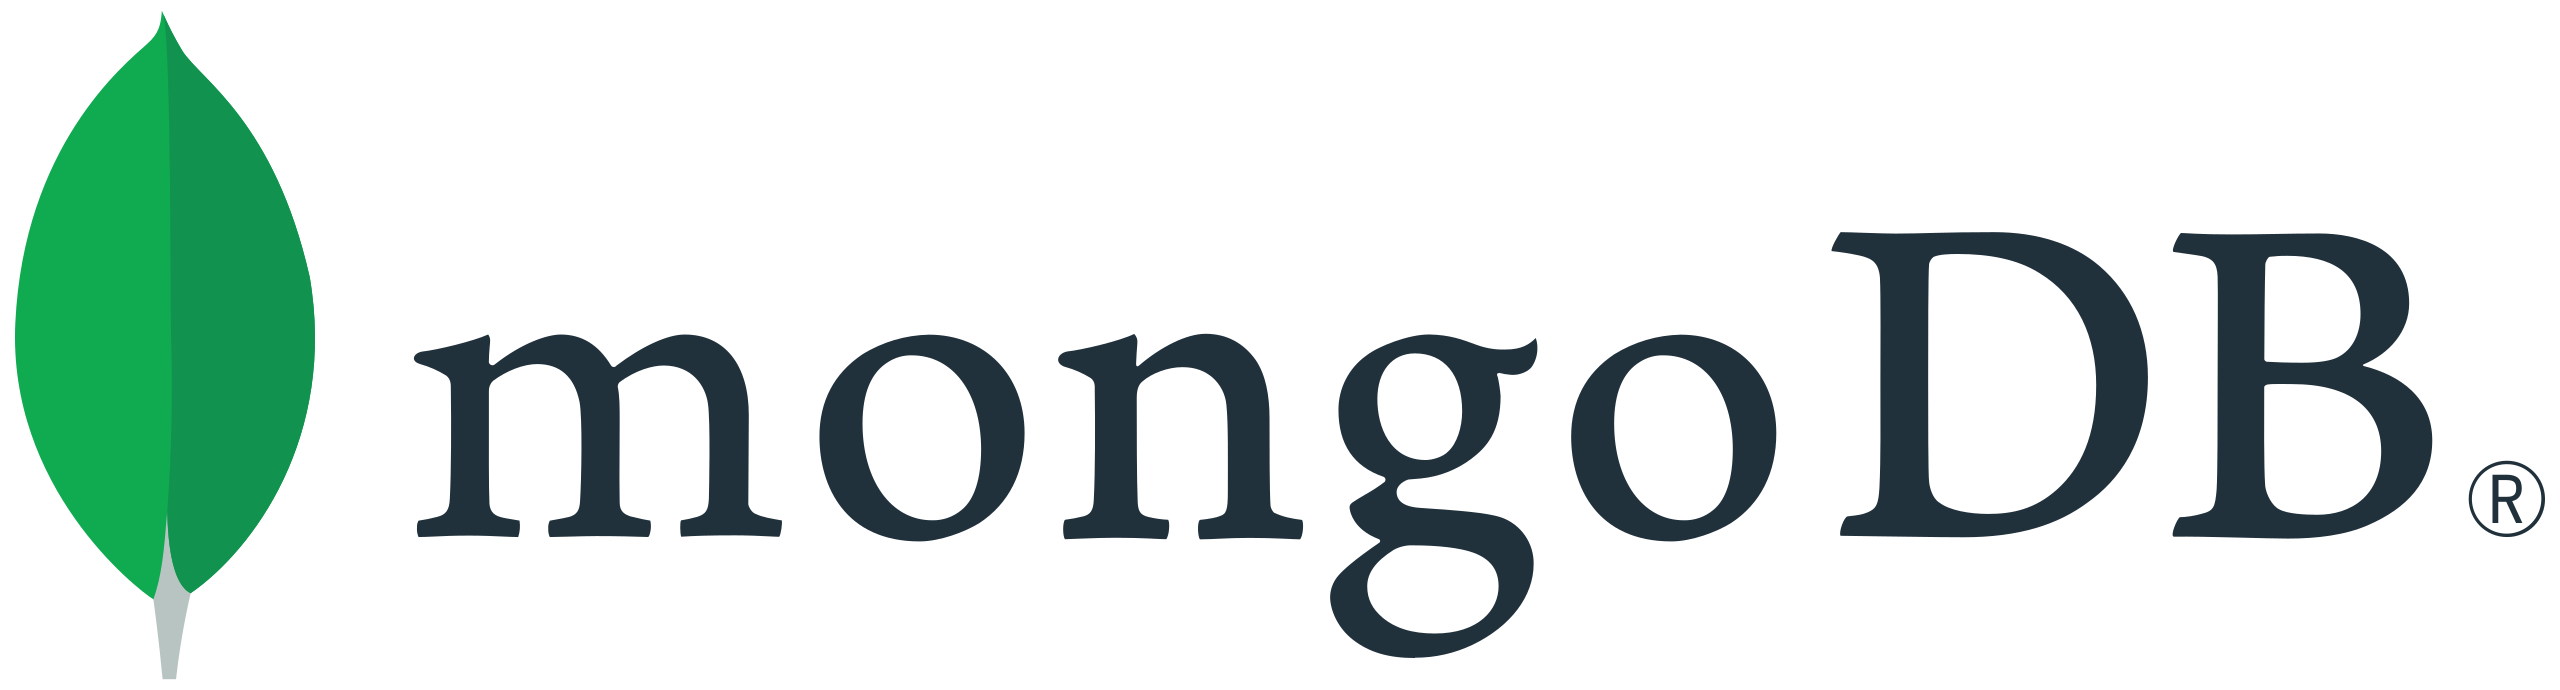

## 1. O que é NoSQL?
- Bancos de dados **NoSQL** (Not Only SQL) não utilizam o modelo relacional tradicional.
- Trabalham com **documentos JSON-like**, coleções e chaves flexíveis.
- Principais vantagens:
  - Escalabilidade horizontal
  - Estrutura flexível de dados
  - Ideal para Big Data e aplicações em tempo real.

**MongoDB** é o banco NoSQL mais popular baseado em documentos.

## 2. Preparando o ambiente
Precisamos instalar o conector do MongoDB para Python chamado `pymongo`.

In [1]:
!pip install pymongo

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/910.9 kB ? eta -:--:--
   ---------------------------------------- 910.9/910.9 kB 4.1 MB/s eta 0:00:00


## 3. Conectando ao MongoDB
Podemos conectar a um servidor local ou à **Atlas (nuvem do MongoDB)**.

Aqui, vamos considerar que temos um MongoDB local rodando na porta padrão (27017).

In [2]:
from pymongo import MongoClient

client = MongoClient('mongodb://localhost:27017/')

print(client.list_database_names)

<bound method MongoClient.list_database_names of MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)>


## 4. Criando um banco de dados e uma coleção
- Banco de dados no MongoDB é criado implicitamente ao inserir documentos.
- Coleção é equivalente a uma 'tabela'.

In [3]:
client.drop_database("aula_mongodb")

db = client["aula_mongodb"]
colecao = db["aluno"]

print("Banco:", db.name)
print("Coleção:", colecao.name)

Banco: aula_mongodb
Coleção: aluno


## 5. Inserindo documentos
Os **documentos** são objetos JSON (em Python, dicionários).

Vamos aos conceitos:

-------------------

### E o que é JSON?
- **JSON** significa **JavaScript Object Notation** (Notação de Objeto JavaScript).
- É um **formato leve de troca de dados**, usado para **representar informações estruturadas** de forma legível por humanos e fácil de processar por máquinas.
- **JSON** é muito usado para **armazenar e transmitir dados** entre aplicações, por exemplo, entre o servidor e o navegador, ou entre um banco de dados e uma aplicação Python, Java, etc.
#### Analogamente:
- Podemos fizer que **JSON** é como um **idioma universal dos dados**, um jeito padronizado de escrever informações que qualquer sistema consegue entender.

### Objeto JSON
- Um objeto **JSON** é um **conjunto de pares chave: valor**, delimitado por chaves {}.
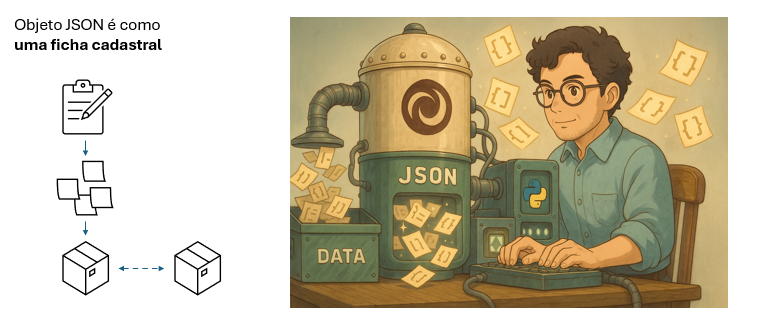

Veja um exemplo de **estrura JSON**

In [4]:
objeto = {
    "nome": "Rafael",
    "idade": 38,
    "profissao": "Professsor",
    "temFilhos": True
}
objeto

{'nome': 'Rafael', 'idade': 38, 'profissao': 'Professsor', 'temFilhos': True}

Neste exemplo:
- `nome`, `idade`, `profissão` e `temFilhos` são **chaves** (ou campos) 
- `Rafael`, `38`, `Professor` e `True` são os **valores** associados a cada chave

### Tipos de dados em JSON

| Tipo        | Exemplo                     | Descrição                               |
| ----------- | --------------------------- | --------------------------------------- |
| **String**  | `"texto"`                   | Cadeia de caracteres entre aspas duplas |
| **Number**  | `42`                        | Número inteiro ou decimal               |
| **Boolean** | `true` ou `false`           | Valor lógico                            |
| **Object**  | `{ "x": 1, "y": 2 }`        | Outro objeto JSON dentro de um          |
| **Array**   | `[1, 2, 3]` ou `["a", "b"]` | Lista ordenada de valores               |
| **null**    | `null`                      | Valor nulo (sem dado)                   |

Vamos ver um exemplo mais completo:

In [5]:
cadastro = {
    "aluno": {
    "nome": "Ana Souza",
    "idade": 21,
    "curso": "Ciência de Dados",
    "notas": [8.5, 9.0, 7.8],
    "endereco": {
      "cidade": "São Paulo",
      "uf": "SP"
    },
    "ativo": True
  }
}
cadastro

{'aluno': {'nome': 'Ana Souza',
  'idade': 21,
  'curso': 'Ciência de Dados',
  'notas': [8.5, 9.0, 7.8],
  'endereco': {'cidade': 'São Paulo', 'uf': 'SP'},
  'ativo': True}}

Neste exemplo temos um objeto principal chamado **aluno** que contém:
- Campos simples (`nome`, `idade`, `curso`, `ativo`)
- Um array (`notas`)
- Um objeto aninhado (`endereco`)

### JSON e MongoDB

O **MongoDB** armazena documentos em um formato muito parecido com **JSON**, chamado **BSON** (Binary JSON).
- **BSON** é uma versão binária e mais eficiente do JSON.
- Ele permite tipos extras, como `Date` e `ObjectId`.
- Cada **documento** em uma coleção **MongoDB** é, na prática, um **objeto JSON enriquecido**.

Exemplo de documento MongoDB:
```python
{
    '_id': ObjectId('68f14e9f7fc1de9931e05834'),
    'nome': 'Rafael',
    'idade': 38,
    'profissao': 'Professor',
    'temFilhos': True
}

## 5. Inserindo documentos em MongoDB

In [6]:
aluno = {"nome": "Matheues", "idade": 19, "curso": "Inteligencia e analise de dados"}
colecao.insert_one(aluno)

InsertOneResult(ObjectId('69029314bf038ff8e00ccc64'), acknowledged=True)

In [8]:
alunos = [
    {"nome": "João", "idade": 25, "curso": "Medicina"},
    {"nome": "Ana", "idade": 20, "curso": "Computação"},
    {"nome": "Pedro", "idade": 23, "curso": "Direito"}
]
colecao.insert_many(alunos)

InsertManyResult([ObjectId('690293eabf038ff8e00ccc65'), ObjectId('690293eabf038ff8e00ccc66'), ObjectId('690293eabf038ff8e00ccc67')], acknowledged=True)

## 6. Consultando documentos
- `find_one()` retorna um único documento.
- `find()` retorna um cursor iterável.

In [9]:
colecao.find_one()

{'_id': ObjectId('69029314bf038ff8e00ccc64'),
 'nome': 'Matheues',
 'idade': 19,
 'curso': 'Inteligencia e analise de dados'}

In [11]:
for doc in colecao.find():
    print(doc)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'curso': 'Inteligencia e analise de dados'}
{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 25, 'curso': 'Medicina'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 20, 'curso': 'Computação'}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 23, 'curso': 'Direito'}


### O que é o ObjectId?

- O `ObjectId` é um tipo especial de dado usado pelo MongoDB como **chave primária** (campo `_id`) de cada documento.
- Ele funciona como um registro único, é automático e globalmente identificável.
- O `ObjectId` é um código hexadecimal de 24 caracteres, que representa 12 bytes binários divididos assim:
| Parte   | Tamanho                  | Significado                                           |
| ------- | ------------------------ | ----------------------------------------------------- |
| 4 bytes | Timestamp                | Momento (em segundos) em que o documento foi criado   |
| 5 bytes | ID da máquina + processo | Identifica o computador e o processo que gerou o ID   |
| 3 bytes | Contador incremental     | Garante que IDs criados no mesmo segundo sejam únicos |

**Exemplo:** 
ObjectId('68d83b1c37b8b2d240fb5b93')

Internamente, o MongoDB lê isso como:
- `68d83b1c`: data e hora da criação
- `37b8b2d240fb`: origem (máquina/processo)
- `5b93`: número sequencial

#### Curiosidade: 
- Você pode gerar um ObjectId manualmente em Python:

In [17]:
from bson import ObjectId
id_novo = ObjectId()
print(id_novo)

6902951fbf038ff8e00ccc6d


## 7. Operadores de Comparação

| Operador | Significado           | Exemplo                                           | Resultado             |
| -------- | --------------------- | ------------------------------------------------- | --------------------- |
| `$eq`    | Igual a               | `{"idade": {"$eq": 25}}`                          | idade = 25            |
| `$ne`    | Diferente de          | `{"idade": {"$ne": 25}}`                          | idade ≠ 25            |
| `$gt`    | Maior que             | `{"idade": {"$gt": 25}}`                          | idade > 25            |
| `$gte`   | Maior ou igual        | `{"idade": {"$gte": 25}}`                         | idade ≥ 25            |
| `$lt`    | Menor que             | `{"idade": {"$lt": 25}}`                          | idade < 25            |
| `$lte`   | Menor ou igual        | `{"idade": {"$lte": 25}}`                         | idade ≤ 25            |
| `$in`    | Está em uma lista     | `{"curso": {"$in": ["Engenharia", "Medicina"]}}`  | curso = um desses     |
| `$nin`   | Não está em uma lista | `{"curso": {"$nin": ["Engenharia", "Medicina"]}}` | curso ≠ nenhum desses |


- Buscar por curso = 'Computação'

In [18]:
resultado = colecao.find({"curso":{"$in":["Computação"]}})
for r in resultado:
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 20, 'curso': 'Computação'}


- Buscar alunos cujo curso não seja "Medicina"

In [21]:
resultado = colecao.find({"curso":{"$ne":"Medicina"}})
for r in resultado:
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'curso': 'Inteligencia e analise de dados'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 20, 'curso': 'Computação'}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 23, 'curso': 'Direito'}


- Buscar alunos cujo curso não seja "Direito" nem "Medicina"

In [22]:
resultado = colecao.find({"curso":{"$nin":["Direito","Medicina"]}})
for r in resultado:
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'curso': 'Inteligencia e analise de dados'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 20, 'curso': 'Computação'}


- Buscar alunos cujo curso seja "Computação" ou "Medicina"

In [23]:
resultado = colecao.find({"curso":{"$in":["Computação", "Medicina"]}})
for r in resultado:
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 25, 'curso': 'Medicina'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 20, 'curso': 'Computação'}


- Buscar por idade maior que 21

In [24]:
resultado = colecao.find({"idade":{"$gt":21}})
for r in resultado:
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 25, 'curso': 'Medicina'}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 23, 'curso': 'Direito'}


- Buscar alunos com idade maior ou igual a 23

In [25]:
resultado = colecao.find({"idade":{"$gte":23}})
for r in resultado:
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 25, 'curso': 'Medicina'}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 23, 'curso': 'Direito'}


- Buscar alunos com idade menor que 21

In [26]:
resultado = colecao.find({"idade":{"$lt":21}})
for r in resultado:
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'curso': 'Inteligencia e analise de dados'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 20, 'curso': 'Computação'}


- Buscar alunos com idade menor ou igual a 20

In [27]:
resultado = colecao.find({"idade":{"$lte":20}})
for r in resultado:
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'curso': 'Inteligencia e analise de dados'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 20, 'curso': 'Computação'}


## 8. Operadores de Atualização

| Operador       | Significado                                    | Exemplo                                                        | Ação                       |
| -------------- | ---------------------------------------------- | -------------------------------------------------------------- | -------------------------- |
| `$set`         | Define ou atualiza um valor                    | `{"$set": {"curso": "Engenharia"}}`                            | Atualiza o campo “curso”   |
| `$unset`       | Remove um campo                                | `{"$unset": {"curso": ""}}`                                    | Apaga o campo “curso”      |
| `$inc`         | Incrementa um número                           | `{"$inc": {"idade": 1}}`                                       | idade = idade + 1          |
| `$mul`         | Multiplica um número                           | `{"$mul": {"salario": 1.1}}`                                   | salario = salario × 1.1    |
| `$rename`      | Renomeia um campo                              | `{"$rename": {"idade": "anos"}}`                               | “idade” → “anos”           |
| `$currentDate` | Define o campo com a data/hora atual           | `{"$currentDate": {"dataAtualizacao": True}}`                  | Adiciona timestamp atual   |
| `$min`         | Atualiza se o novo valor for menor             | `{"$min": {"nota": 5}}`                                        | Atualiza se nota atual > 5 |
| `$max`         | Atualiza se o novo valor for maior             | `{"$max": {"nota": 9}}`                                        | Atualiza se nota atual < 9 |
| `$push`        | Adiciona item ao array                         | `{"$push": {"disciplinas": "Física"}}`                         | Acrescenta “Física”        |
| `$addToSet`    | Adiciona ao array apenas se não existir        | `{"$addToSet": {"disciplinas": "Matemática"}}`                 | Evita duplicar             |
| `$pop`         | Remove último ou primeiro elemento de um array | `{"$pop": {"disciplinas": 1}}`                                 | Remove o último (1)        |
| `$pull`        | Remove itens que satisfaçam condição           | `{"$pull": {"disciplinas": "Física"}}`                         | Remove “Física”            |
| `$each`        | Aplica múltiplas inserções em array            | `{"$push": {"disciplinas": {"$each": ["Física", "Química"]}}}` | Adiciona vários itens      |


- Atualizar a idade de Ana para 23

In [28]:
colecao.update_one({"nome": "Ana"}, {"$set": {"idade":23}})
print(colecao.find_one({"nome": "Ana"}))

{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 23, 'curso': 'Computação'}


- Atualizar o curso de Ana para "Engenharia de Dados"

In [29]:
colecao.update_one({"nome": "Ana"}, {"$set": {"curso":"engenharia de dados"}})
print(colecao.find_one({"nome": "Ana"}))

{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 23, 'curso': 'engenharia de dados'}


- Remover o campo 'curso' de Matheus

In [30]:
colecao.update_one({"nome": "Matheues"}, {"$unset": {"curso":""}})
print(colecao.find_one({"nome": "Matheues"}))

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19}


- Aumentar a idade de Pedro em 1 ano

In [31]:
colecao.update_one({"nome": "Pedro"}, {"$inc": {"idade": 1}})
print(colecao.find_one({"nome": "Pedro"}))

{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 24, 'curso': 'Direito'}


- Multiplicar a idade de Pedro por 1.05 (ajuste fictício)

In [32]:
colecao.update_one({"nome": "Pedro"}, {"$mul": {"idade": 1.05}})
print(colecao.find_one({"nome": "Pedro"}))

{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'curso': 'Direito'}


- Renomear o campo "curso" para "formacao"

In [35]:
colecao.update_many({}, {"$rename": {"curso":"formaçao"}})
for r in colecao.find():
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19}
{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 25, 'formaçao': 'Medicina'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 23, 'formaçao': 'engenharia de dados'}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'formaçao': 'Direito'}


- Adicionar campo "atualizado_em" com a data atual

In [36]:
colecao.update_many({}, {"$currentDate": {"atualizado_em":True}})
for r in colecao.find():
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 25, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 23, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'formaçao': 'Direito', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


- Atualizar idade apenas se o novo valor for menor que o atual

In [38]:
colecao.update_one({"nome": "João"}, {"$min": {"idade": 22}})
print(colecao.find_one({"nome": "João"}))

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


- Atualizar idade apenas se o novo valor for maior que o atual

In [39]:
colecao.update_one({"nome": "Ana"}, {"$max": {"idade": 30}})
print(colecao.find_one({"nome": "Ana"}))

{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


##### `$push` — Adiciona um valor ao final de um array existente
- Adicionar uma nova disciplina para o aluno Matheus

In [40]:
colecao.update_one({"nome": "Matheues"}, {"$push": {"disciplinas": "Matematica"}})
print(colecao.find_one({"nome": "Matheues"}))

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Matematica']}


##### `$addToSet` — Adiciona ao array apenas se o valor ainda não existir
- Adicionar disciplina sem repetir

In [44]:
colecao.update_one({"nome": "Matheues"}, {"$addToSet": {"disciplinas": "Português"}})
print(colecao.find_one({"nome": "Matheues"}))

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Português']}


 - Remover o último elemento da lista de disciplinas

In [43]:
colecao.update_one({"nome": "Matheues"}, {"$pop": {"disciplinas": -1}})
print(colecao.find_one({"nome": "Matheues"}))

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': []}


- Remover disciplina específica

In [45]:
colecao.update_one({"nome": "Matheues"}, {"$pull": {"disciplinas": "Português"}})
print(colecao.find_one({"nome": "Matheues"}))

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': []}


##### `$each` — Insere vários elementos de uma só vez em um array (usado junto com `$push` ou `$addToSet`)
- Adicionar várias disciplinas de uma vez

In [47]:
colecao.update_one(
    {"nome": "Matheues"}, 
    {"$push": {"disciplinas":{"$each": ["Fisisca", "Quimica", "Biologia"]}}})
print(colecao.find_one({"nome": "Matheues"}))

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Fisisca', 'Quimica', 'Biologia']}


## 9. Operadores de Elemento

| Operador  | Significado                | Exemplo                       |
| --------- | -------------------------- | ----------------------------- |
| `$exists` | Verifica se o campo existe | `{"nota": {"$exists": true}}` |
| `$type`   | Verifica o tipo do campo   | `{"idade": {"$type": "int"}}` |

- Buscar alunos que possuam o campo "curso"

In [48]:
resultado = colecao.find({"curso": {"$exists": True}})
for r in resultado:
    print(r)

- Buscar alunos que possuam o campo "formacao"

In [49]:
resultado = colecao.find({"formaçao": {"$exists": True}})
for r in resultado:
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'formaçao': 'Direito', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


- Buscar alunos cujo campo idade seja do tipo inteiro

In [50]:
resultado = colecao.find({"idade": {"$type": "int"}})
for r in resultado:
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Fisisca', 'Quimica', 'Biologia']}
{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


## 10. Operadores Lógicos

| Operador | Significado      | Exemplo                                                      | Resultado                           |
| -------- | ---------------- | ------------------------------------------------------------ | ----------------------------------- |
| `$and`   | E lógico         | `{"$and": [{"idade": {"$gt": 18}}, {"idade": {"$lt": 30}}]}` | idade > 18 **e** < 30               |
| `$or`    | Ou lógico        | `{"$or": [{"curso": "Engenharia"}, {"curso": "Medicina"}]}`  | curso = Engenharia **ou** Medicina  |
| `$nor`   | Nem um nem outro | `{"$nor": [{"curso": "Engenharia"}, {"curso": "Medicina"}]}` | curso ≠ Engenharia **e** ≠ Medicina |
| `$not`   | Negação          | `{"idade": {"$not": {"$gte": 18}}}`                          | idade < 18                          |


- Buscar alunos com idade maior que 20 E curso diferente de "Direito"

In [53]:
resultado = colecao.find({"$and": [{"idade":{"$gt":20}}, {"formaçao":{"$ne": "Direito"}}]})
for r in resultado:
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


- Buscar alunos com idade menor que 21 OU curso igual a "Medicina"

In [55]:
resultado = colecao.find({"$or": [{"idade":{"$lt":21}}, {"formaçao":{"$in": ["Medicina"]}}]})
for r in resultado:
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Fisisca', 'Quimica', 'Biologia']}
{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


- Buscar alunos que NÃO tenham idade menor que 21 NEM curso "Direito"

In [56]:
resultado = colecao.find({"$nor": [{"idade":{"$lt":21}}, {"formaçao":{"$in": ["Direito"]}}]})
for r in resultado:
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


- Buscar alunos cuja idade NÃO seja maior que 21

In [57]:
resultado = colecao.find({"idade":{"$not": {"$gt": 21}}})
for r in resultado:
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Fisisca', 'Quimica', 'Biologia']}


## 11. Operadores de Agregação (para pipelines)

| Operador   | Significado                    | Exemplo                                                      |
| ---------- | ------------------------------ | ------------------------------------------------------------ |
| `$sum`     | Soma valores                   | `{"$sum": "$idade"}`                                         |
| `$avg`     | Média de valores               | `{"$avg": "$idade"}`                                         |
| `$min`     | Valor mínimo                   | `{"$min": "$idade"}`                                         |
| `$max`     | Valor máximo                   | `{"$max": "$idade"}`                                         |
| `$count`   | Conta elementos                | `{"$count": "total"}`                                        |
| `$group`   | Agrupa documentos              | `{"$group": {"_id": "$curso", "media": {"$avg": "$idade"}}}` |
| `$match`   | Filtra documentos (como WHERE) | `{"$match": {"idade": {"$gt": 21}}}`                         |
| `$project` | Seleciona campos a retornar    | `{"$project": {"nome": 1, "idade": 1}}`                      |
| `$sort`    | Ordena resultados              | `{"$sort": {"idade": -1}}`                                   |
| `$limit`   | Limita número de resultados    | `{"$limit": 5}`                                              |
| `$skip`    | Pula N documentos              | `{"$skip": 10}`                                              |

### O que é um pipeline de agregação?

- Um pipeline é uma sequência de etapas (stages) usada no framework de agregação do MongoDB.
- Cada etapa transforma os dados e passa o resultado para a próxima, até gerar a saída final.

##### É como uma linha de montagem:
Cada estação (etapa) faz uma operação específica: filtra, agrupa, calcula, ordena, etc.

Exemplo:

In [63]:
pipeline = [
    {"$match": {"idade": {"$gt": 20}}},
    {"$group": {"_id": "$formaçao", "media_idade": {"$avg": "$idade"}}},
    {"$sort": {"media_idade": -1}}
]

resultado = colecao.aggregate(pipeline)
for r in resultado:
    print(r)

{'_id': 'engenharia de dados', 'media_idade': 30.0}
{'_id': 'Direito', 'media_idade': 25.200000000000003}
{'_id': 'Medicina', 'media_idade': 22.0}


- Somar as idades de todos os alunos por curso

Obs: O operador `$group` sempre precisa de um campo `_id` e nesse caso a referência do campo precisa receber o caracter `$`

In [66]:
pipeline = [
    {"$group": {"_id": "$formacao", "soma_idades": {"$sum": "$idade"}}}, # Agrupa e soma idade
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)



{'_id': None, 'soma_idades': 96.2}


- Somar as idades de todos os alunos

In [67]:
pipeline = [
    {"$group": {"_id": None, "soma_idades": {"$sum": "$idade"}}}, # Agrupa e soma idade
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)


{'_id': None, 'soma_idades': 96.2}


- Encontre o menor valor dentro do agrupamento `idade`

In [68]:
pipeline = [
    {"$group": {"_id": None, "soma_idades": {"$min": "$idade"}}}, # Agrupa e soma idade
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)


{'_id': None, 'soma_idades': 19}


- Encontre o maior valor dentro do agrupamento `idade`

In [70]:
pipeline = [
    {"$group": {"_id": None, "soma_idades": {"$max": "$idade"}}}, # Agrupa e soma idade
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)

{'_id': None, 'soma_idades': 30}


- Contar o total de documentos

In [74]:
pipeline = [
    {"$count": "total_alunos"}
]

resultado = colecao.aggregate(pipeline)
for r in resultado:
    print(r)

{'total_alunos': 4}


- `$project` — seleciona ou transforma campos

Serve para escolher o que mostrar no resultado e também criar novos campos calculados
- Valor `0` oculta
- Valor `1` mostra

Exemplo:

In [75]:
pipeline = [
    {"$project": {
        "_id": 0, 
        "nome": 1,
        "idade":1,
        "idade_em_meses":{"$multiply": ["$idade", 12]}
    }}, # Agrupa e soma idade
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)

{'nome': 'Matheues', 'idade': 19, 'idade_em_meses': 228}
{'nome': 'João', 'idade': 22, 'idade_em_meses': 264}
{'nome': 'Ana', 'idade': 30, 'idade_em_meses': 360}
{'nome': 'Pedro', 'idade': 25.200000000000003, 'idade_em_meses': 302.40000000000003}


#### Por que preciso ocultar um campo se posso apenas não relacioná-lo?
- Por padrão, o MongoDB inclui automaticamente o _id, a menos que você diga explicitamente que não quer ("_id": 0).

In [76]:
for r in colecao.find():
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Fisisca', 'Quimica', 'Biologia']}
{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'formaçao': 'Direito', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}


- `$limit` — limita o número de documentos retornados

In [77]:
pipeline = [
    {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
    {"$limit": 2}
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)

{'nome': 'Matheues', 'idade': 19}
{'nome': 'João', 'idade': 22}


- `$skip` — pula N documentos

In [78]:
pipeline = [
    {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
    {"$skip": 2}
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)

{'nome': 'Ana', 'idade': 30}
{'nome': 'Pedro', 'idade': 25.200000000000003}


#### A combinação de `$skip` + `$limit` normalmente são utilizadas para **paginação**, por exemplo:

In [80]:
alunos = [
    {"nome": "Samantha", "idade": 25, "curso": "Cinema"},
    {"nome": "Paulo", "idade": 20, "curso": "Educaçao fisica"},
    {"nome": "Yasmin", "idade": 23, "curso": "Administração"}
]
colecao.insert_many(alunos)

for r in colecao.find():
    print(r)

{'_id': ObjectId('69029314bf038ff8e00ccc64'), 'nome': 'Matheues', 'idade': 19, 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000), 'disciplinas': ['Fisisca', 'Quimica', 'Biologia']}
{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'formaçao': 'Direito', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('6902af89bf038ff8e00ccc6e'), 'nome': 'Samuel', 'idade': 25, 'curso': 'Engenharia'}
{'_id': ObjectId('6902af89bf038ff8e00ccc6f'), 'nome': 'Julia', 'idade': 20, 'curso': 'Contabilidade'}
{'_id': ObjectId('6902af89bf038ff8e00ccc70'), 'nome': 'Murilo', '

- Primeira página (exibir os 2 primeiros registros)

In [81]:
pipeline = [
    {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
    {"$skip": 0},
    {"$limit": 2}
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)

{'nome': 'Matheues', 'idade': 19}
{'nome': 'João', 'idade': 22}


- Segunda página (pular os 2 primeiros, mostrar os 2 seguintes)

In [82]:
pipeline = [
    {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
    {"$skip": 2},
    {"$limit": 2}
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)

{'nome': 'Ana', 'idade': 30}
{'nome': 'Pedro', 'idade': 25.200000000000003}


- Terceira página (pular 4 e pegar os 2 seguintes)

In [83]:
pipeline = [
    {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
    {"$skip": 4},
    {"$limit": 2}
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)

{'nome': 'Samuel', 'idade': 25}
{'nome': 'Julia', 'idade': 20}


- Automatizando a paginação

In [84]:
def listar_pagina(colecao, pagina, por_pagina):
    skip = 2
    pipeline = [
        {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
        {"$skip": skip},
        {"$limit": 2}
    ]
    return list(colecao.aggregate(pipeline))

resultado = colecao.aggregate(pipeline)

for aluno in listar_pagina(colecao,2,2):
    print(aluno)

{'nome': 'Ana', 'idade': 30}
{'nome': 'Pedro', 'idade': 25.200000000000003}


In [85]:
def listar_pagina(colecao, pagina, por_pagina):
    pipeline = [
        {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
        {"$skip": pagina},
        {"$limit": por_pagina}
    ]
    return list(colecao.aggregate(pipeline))

resultado = colecao.aggregate(pipeline)

for aluno in listar_pagina(colecao,2,2):
    print(aluno)

{'nome': 'Ana', 'idade': 30}
{'nome': 'Pedro', 'idade': 25.200000000000003}


## 12. Removendo documentos

In [87]:
por_pagina = 2

total = colecao.count_documents({})

for i in range(0, total, por_pagina):
    pipeline = [
        {"$project": { "_id": 0,  "nome": 1, "idade":1,}},
        {"$skip": i},
        {"$limit": por_pagina}
    ]
    resultado =  colecao.aggregate(pipeline)
    print(f"\n --- Página{i//por_pagina+1}---")
    for r in resultado:
        print(r)


 --- Página1---
{'nome': 'Matheues', 'idade': 19}
{'nome': 'João', 'idade': 22}

 --- Página2---
{'nome': 'Ana', 'idade': 30}
{'nome': 'Pedro', 'idade': 25.200000000000003}

 --- Página3---
{'nome': 'Samuel', 'idade': 25}
{'nome': 'Julia', 'idade': 20}

 --- Página4---
{'nome': 'Murilo', 'idade': 23}
{'nome': 'Samantha', 'idade': 25}

 --- Página5---
{'nome': 'Paulo', 'idade': 20}
{'nome': 'Yasmin', 'idade': 23}


## 13. Removendo Campos de todos os documentos
- Remover o campo `atualizado_em`

In [88]:
colecao.delete_one({"nome":"Matheues"})
for r in colecao.find():
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'formaçao': 'Direito', 'atualizado_em': datetime.datetime(2025, 10, 29, 22, 50, 19, 723000)}
{'_id': ObjectId('6902af89bf038ff8e00ccc6e'), 'nome': 'Samuel', 'idade': 25, 'curso': 'Engenharia'}
{'_id': ObjectId('6902af89bf038ff8e00ccc6f'), 'nome': 'Julia', 'idade': 20, 'curso': 'Contabilidade'}
{'_id': ObjectId('6902af89bf038ff8e00ccc70'), 'nome': 'Murilo', 'idade': 23, 'curso': 'Veterinaria'}
{'_id': ObjectId('6902afd6bf038ff8e00ccc71'), 'nome': 'Samantha', 'idade': 25, 'curso': 'Cinema'}
{'_id': ObjectId('6902afd6bf038ff8e00ccc72'), 'nome': 'Paulo', 'id

In [89]:
colecao.update_many({},{"$unset": {"atualizado_em": ""}})
for r in colecao.find():
    print(r)

{'_id': ObjectId('690293eabf038ff8e00ccc65'), 'nome': 'João', 'idade': 22, 'formaçao': 'Medicina'}
{'_id': ObjectId('690293eabf038ff8e00ccc66'), 'nome': 'Ana', 'idade': 30, 'formaçao': 'engenharia de dados'}
{'_id': ObjectId('690293eabf038ff8e00ccc67'), 'nome': 'Pedro', 'idade': 25.200000000000003, 'formaçao': 'Direito'}
{'_id': ObjectId('6902af89bf038ff8e00ccc6e'), 'nome': 'Samuel', 'idade': 25, 'curso': 'Engenharia'}
{'_id': ObjectId('6902af89bf038ff8e00ccc6f'), 'nome': 'Julia', 'idade': 20, 'curso': 'Contabilidade'}
{'_id': ObjectId('6902af89bf038ff8e00ccc70'), 'nome': 'Murilo', 'idade': 23, 'curso': 'Veterinaria'}
{'_id': ObjectId('6902afd6bf038ff8e00ccc71'), 'nome': 'Samantha', 'idade': 25, 'curso': 'Cinema'}
{'_id': ObjectId('6902afd6bf038ff8e00ccc72'), 'nome': 'Paulo', 'idade': 20, 'curso': 'Educaçao fisica'}
{'_id': ObjectId('6902afd6bf038ff8e00ccc73'), 'nome': 'Yasmin', 'idade': 23, 'curso': 'Administração'}


# Exercícios 

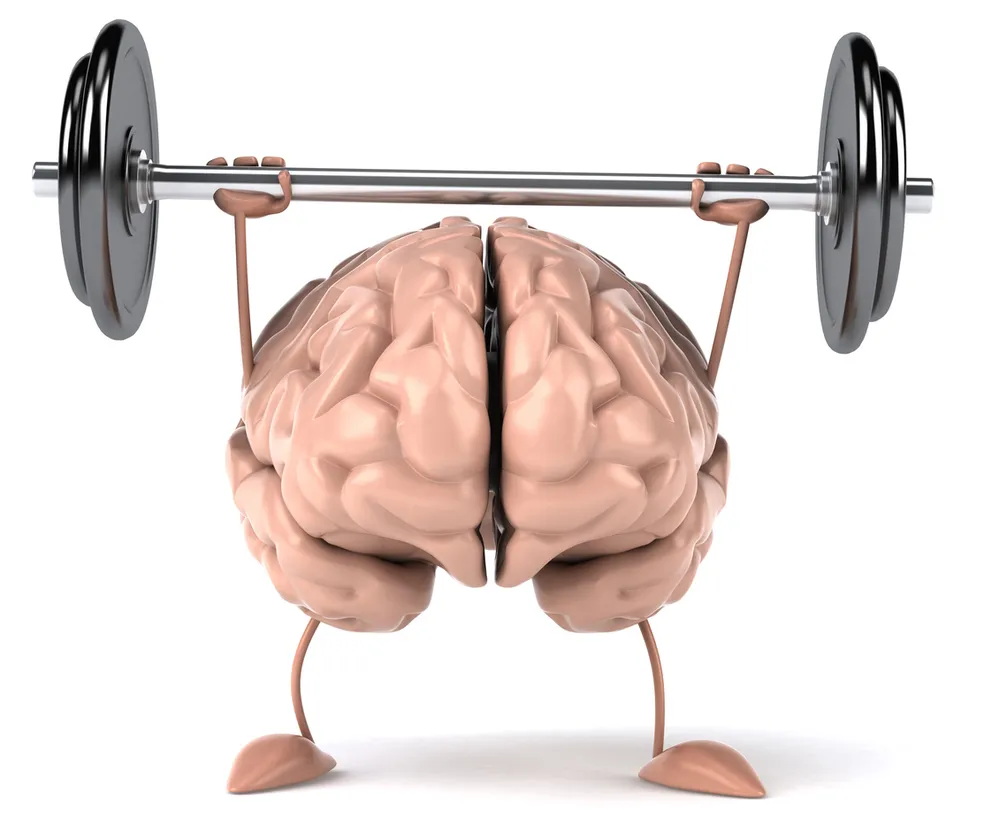

### Exercício 1 – Estatísticas de Idade por Curso

Monte um *pipeline* que apresente, para cada curso:  
- A **idade média**,  
- A **idade mínima**,  
- A **idade máxima**,  
- E o **total de alunos**.  

Ordene o resultado do curso com **maior média de idade** para o menor.

In [90]:
pipeline = [
    # 1️⃣ Seleciona apenas os campos necessários
    {
        "$project": {
            "_id": 0,
            "curso": 1,
            "idade": 1
        }
    },
    
    # 2️⃣ Agrupa os alunos por curso e calcula as estatísticas
    {
        "$group": {
            "_id": "$curso",
            "idade_media": {"$avg": "$idade"},
            "idade_minima": {"$min": "$idade"},
            "idade_maxima": {"$max": "$idade"},
            "total_alunos": {"$sum": 1}
        }
    },
    
    # 3️⃣ Ordena do curso com maior média de idade para o menor
    {
        "$sort": {
            "idade_media": -1
        }
    },
    
    # 4️⃣ (Opcional) Renomeia o campo `_id` para `curso` na saída
    {
        "$project": {
            "_id": 0,
            "curso": "$_id",
            "idade_media": 1,
            "idade_minima": 1,
            "idade_maxima": 1,
            "total_alunos": 1
        }
    }
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)


{'idade_media': 25.733333333333334, 'idade_minima': 22, 'idade_maxima': 30, 'total_alunos': 3, 'curso': None}
{'idade_media': 25.0, 'idade_minima': 25, 'idade_maxima': 25, 'total_alunos': 1, 'curso': 'Engenharia'}
{'idade_media': 25.0, 'idade_minima': 25, 'idade_maxima': 25, 'total_alunos': 1, 'curso': 'Cinema'}
{'idade_media': 23.0, 'idade_minima': 23, 'idade_maxima': 23, 'total_alunos': 1, 'curso': 'Administração'}
{'idade_media': 23.0, 'idade_minima': 23, 'idade_maxima': 23, 'total_alunos': 1, 'curso': 'Veterinaria'}
{'idade_media': 20.0, 'idade_minima': 20, 'idade_maxima': 20, 'total_alunos': 1, 'curso': 'Contabilidade'}
{'idade_media': 20.0, 'idade_minima': 20, 'idade_maxima': 20, 'total_alunos': 1, 'curso': 'Educaçao fisica'}


### Exercício 2 – Filtros Lógicos Combinados

Liste os alunos que:
- Têm **idade entre 20 e 25**,  
- \+ **E (AND)** cujo curso **não seja "Medicina"**,  
- \+ **OU (OR)** o nome comece com a letra “M”.  

Utilize operadores lógicos (`$and`, `$or`, `$regex`) para construir a consulta.

In [91]:
filtro = {
    "$or": [
        # 1️⃣ Condição principal: idade entre 20 e 25 e curso != Medicina
        {
            "$and": [
                {"idade": {"$gte": 20, "$lte": 25}},
                {"curso": {"$ne": "Medicina"}}
            ]
        },
        # 2️⃣ OU: nome começa com "M"
        {"nome": {"$regex": "^M", "$options": "i"}}
    ]
}

resultado = colecao.find(filtro, {"_id": 0, "nome": 1, "idade": 1, "curso": 1})

for r in resultado:
    print(r)


{'nome': 'João', 'idade': 22}
{'nome': 'Samuel', 'idade': 25, 'curso': 'Engenharia'}
{'nome': 'Julia', 'idade': 20, 'curso': 'Contabilidade'}
{'nome': 'Murilo', 'idade': 23, 'curso': 'Veterinaria'}
{'nome': 'Samantha', 'idade': 25, 'curso': 'Cinema'}
{'nome': 'Paulo', 'idade': 20, 'curso': 'Educaçao fisica'}
{'nome': 'Yasmin', 'idade': 23, 'curso': 'Administração'}


### Exercício 3 – Manipulação de Arrays

Suponha que cada documento de aluno possua um campo `disciplinas` (array).  

1. Adicione as disciplinas `["Banco de Dados", "Estatística"]` a todos os alunos.  
2. Adicione **"Machine Learning"** apenas se ainda **não existir** no array.  
3. Remova a **primeira disciplina** da lista.  
4. Exiba os nomes dos alunos e suas listas de disciplinas atualizadas.

In [92]:
colecao.update_many(
    {},
    {"$push": {"disciplinas": {"$each": ["Banco de Dados", "Estatística"]}}}
)


UpdateResult({'n': 9, 'nModified': 9, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [93]:
colecao.update_many(
    {},
    {"$addToSet": {"disciplinas": "Machine Learning"}}
)


UpdateResult({'n': 9, 'nModified': 9, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [94]:
colecao.update_many(
    {},
    {"$pop": {"disciplinas": -1}}
)


UpdateResult({'n': 9, 'nModified': 9, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [95]:
resultado = colecao.find({}, {"_id": 0, "nome": 1, "disciplinas": 1})

for r in resultado:
    print(r)


{'nome': 'João', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Ana', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Pedro', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Samuel', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Julia', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Murilo', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Samantha', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Paulo', 'disciplinas': ['Estatística', 'Machine Learning']}
{'nome': 'Yasmin', 'disciplinas': ['Estatística', 'Machine Learning']}


### Exercício 4 – Paginação e Projeção Combinada

Crie um loop que percorra todos os alunos, exibindo **3 alunos por página**,  
mostrando apenas os campos `nome` e `curso`,  
ordenados pela idade em **ordem crescente**.  

O resultado deve indicar o **número da página** antes de cada grupo de alunos.

In [96]:
# Define o tamanho da página
tamanho_pagina = 3

# Conta o total de documentos (alunos)
total_alunos = colecao.count_documents({})

# Calcula o total de páginas
total_paginas = (total_alunos + tamanho_pagina - 1) // tamanho_pagina

# Loop para exibir página por página
for pagina in range(total_paginas):
    print(f"\n📄 Página {pagina + 1}")
    
    # Define o "pular" (skip) e "limitar" (limit)
    skip = pagina * tamanho_pagina
    
    # Busca com ordenação, projeção e paginação
    resultado = colecao.find(
        {},  # sem filtro
        {"_id": 0, "nome": 1, "curso": 1}  # projeção dos campos
    ).sort("idade", 1).skip(skip).limit(tamanho_pagina)
    
    # Exibe os resultados
    for aluno in resultado:
        print(aluno)



📄 Página 1
{'nome': 'Paulo', 'curso': 'Educaçao fisica'}
{'nome': 'Julia', 'curso': 'Contabilidade'}
{'nome': 'João'}

📄 Página 2
{'nome': 'Yasmin', 'curso': 'Administração'}
{'nome': 'Murilo', 'curso': 'Veterinaria'}
{'nome': 'Samuel', 'curso': 'Engenharia'}

📄 Página 3
{'nome': 'Samantha', 'curso': 'Cinema'}
{'nome': 'Pedro'}
{'nome': 'Ana'}


### Exercício 5 – Agregação com Condições e Cálculo Derivado

Crie um *pipeline* que mostre:
- A **média de idade** dos alunos,  
- Somente para cursos cujo **nome contenha a letra “a”**,  
- E adicione um campo derivado chamado `idade_media_meses` = média * 12,  
- Ordenando do curso com **menor média** para o **maior**.

In [97]:
pipeline = [
    # 1️⃣ Filtra cursos cujo nome contenha a letra "a" (maiúscula ou minúscula)
    {
        "$match": {
            "curso": {"$regex": "a", "$options": "i"}
        }
    },

    # 2️⃣ Agrupa por curso e calcula a média de idade
    {
        "$group": {
            "_id": "$curso",
            "idade_media": {"$avg": "$idade"}
        }
    },

    # 3️⃣ Cria o campo derivado "idade_media_meses" = média * 12
    {
        "$addFields": {
            "idade_media_meses": {"$multiply": ["$idade_media", 12]}
        }
    },

    # 4️⃣ Ordena do curso com menor média de idade para o maior
    {
        "$sort": {
            "idade_media": 1
        }
    },

    # 5️⃣ Formata a saída (renomeia o campo _id → curso)
    {
        "$project": {
            "_id": 0,
            "curso": "$_id",
            "idade_media": 1,
            "idade_media_meses": 1
        }
    }
]

resultado = colecao.aggregate(pipeline)

for r in resultado:
    print(r)


{'idade_media': 20.0, 'idade_media_meses': 240.0, 'curso': 'Contabilidade'}
{'idade_media': 20.0, 'idade_media_meses': 240.0, 'curso': 'Educaçao fisica'}
{'idade_media': 23.0, 'idade_media_meses': 276.0, 'curso': 'Veterinaria'}
{'idade_media': 23.0, 'idade_media_meses': 276.0, 'curso': 'Administração'}
{'idade_media': 25.0, 'idade_media_meses': 300.0, 'curso': 'Engenharia'}
{'idade_media': 25.0, 'idade_media_meses': 300.0, 'curso': 'Cinema'}
